In [2]:
# Imports ======================================================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearnex import patch_sklearn
patch_sklearn()
from IPython.display import display, HTML
from sklearn.ensemble import IsolationForest

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# Data reading =================================================================================================================
dfo = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_orderbook_df.csv')
dft = pd.read_csv('/Users/Luis1/Projetos/Python/estudo/anomaly_detection/datasets/csv/btc_trades_df.csv')
dfo.columns = ['price', 'volume', 'type']
dft.columns = ['date','type','price', 'volume']

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))
    
display_side_by_side([dfo.head(10), dft.head(10)], ['OrderBook', 'Trade'])

,price,volume,type
0,207100.000000,0.022100,sell
1,207165.000000,0.328000,sell
2,207273.000000,0.328000,sell
3,207352.000000,0.499000,sell
4,207550.990000,0.017000,sell
5,207634.976903,0.566024,sell
6,207634.982241,0.566024,sell
7,207634.987570,0.245000,sell
8,207638.330000,0.183000,sell
9,207638.340000,0.000010,sell


In [4]:
def detect_anomalies(df, anomaly_inputs, contamination=0.025, random_state=42):
    model = IsolationForest(contamination=contamination, random_state=random_state).fit(df[anomaly_inputs])

    df['anomaly_scores'] = model.decision_function(df[anomaly_inputs])
    df['anomaly'] = model.predict(df[anomaly_inputs])

In [5]:
anomaly_inputs = ['price', 'volume']
detect_anomalies(dfo, anomaly_inputs)
detect_anomalies(dft, anomaly_inputs)
display_side_by_side([dfo.loc[:, ['price','volume', 'anomaly_scores', 'anomaly']].head(10), dft.loc[:, ['price','volume', 'anomaly_scores', 'anomaly']].head(10)], ['OrderBook with anomaly', 'Trade with anomaly'])

,price,volume,anomaly_scores,anomaly
0,207100.000000,0.022100,0.224827,1
1,207165.000000,0.328000,0.059137,1
2,207273.000000,0.328000,0.059137,1
3,207352.000000,0.499000,0.010930,1
4,207550.990000,0.017000,0.236687,1
5,207634.976903,0.566024,-0.000958,-1
6,207634.982241,0.566024,-0.000958,-1
7,207634.987570,0.245000,0.070058,1
8,207638.330000,0.183000,0.073787,1
9,207638.340000,0.000010,0.294429,1


In [17]:
def outlier_plot(data, method_name, x_var, y_var):
    #print(f'Mtodo: {method_name}')
    
    method = f'{method_name}_anomaly'

    print(f'Number of anomalus values: {len(data[data.anomaly == -1])}')
    print(f'Number of non anomalus values: {len(data[data.anomaly == 1])}')
    print(f'Total number of values: {len(data)}')

    colors = {1: 'green', -1: 'red'}
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', palette=colors, hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var, edgecolor='black', s=50)
    #g.fig.suptitle(f'Method: {method_name}', y=1.10, fontweight='bold')
    
    axes = g.axes.flatten()
    axes[0].set_title(f'Anômalos\n{len(data[data.anomaly == -1])} pontos', fontsize=15, fontweight='bold')
    axes[1].set_title(f'Normais\n{len(data[data.anomaly == 1])} pontos', fontsize=15, fontweight='bold')

    for ax in axes:
        ax.set_xlabel("preço", fontsize=12, fontweight='bold')
        ax.set_ylabel("volume", fontsize=12, fontweight='bold')
    return g

Number of anomalus values: 50
Number of non anomalus values: 1950
Total number of values: 2000


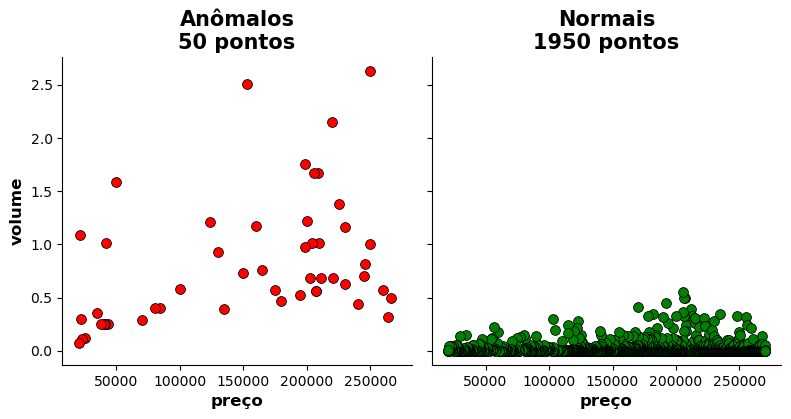

In [18]:
outlier_plot(dfo, "iForest", "price","volume")

Number of anomalus values: 6598
Number of non anomalus values: 257402
Total number of values: 264000


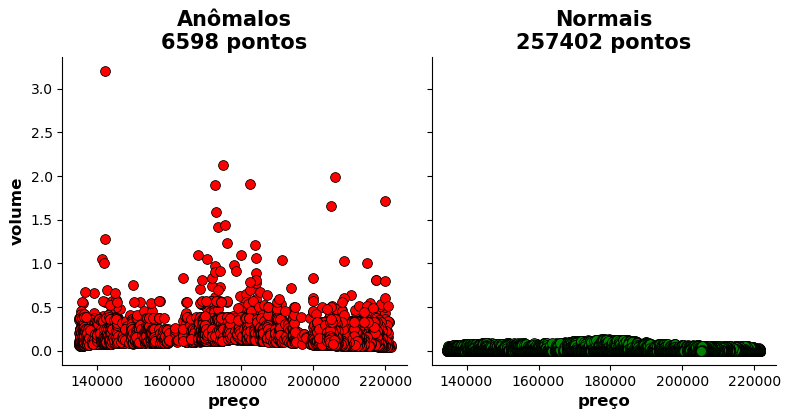

In [19]:
outlier_plot(dft, "Isolation Forest", "price","volume")